<a href="https://colab.research.google.com/github/anms2024/DRL-Assignment-Group191/blob/main/Copy_of_MAB_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `---------------Mandatory Information to fill------------`

### Group ID:191
### Group Members Name with Student ID:
1. KAUSHAL RAJKOTIA - 2023ad05029@wilp.bits-pilani.ac.in
2. M S ANJANA - 2023ac05498@wilp.bits-pilani.ac.in
3. NAGENDRA KUMAR  - 2023ac05904@wilp.bits-pilani.ac.in


# Background

In the world of online streaming, user satisfaction and engagement are critical metrics for the success of a movie recommendation system. A well-designed recommendation algorithm can significantly enhance user experience by suggesting movies that align with their preferences, leading to higher platform retention and usage. Recommendation systems face the challenge of balancing exploration (discovering new movies) with exploitation (recommending known favourites) to maximize user satisfaction over time.


# Scenario

Imagine a leading online movie streaming platform, TrendMovie Inc., that aims to become the go-to destination for personalized movie recommendations. The platform features a vast collection of movies catering to diverse audiences. TrendMovie Inc. wants to optimize its recommendation strategy to deliver maximum user satisfaction while maintaining a high level of engagement. Each movie recommendation is treated as an interaction with the user, and their feedback is used to refine the recommendation strategy dynamically.


# Objective

Your objective is to design and implement a recommendation system using Multi-Armed Bandit (MAB) algorithms to maximize cumulative user satisfaction. The system should dynamically allocate recommendations by learning user preferences in real-time, striking the right balance between exploration and exploitation.


# Dataset

The dataset contains user ratings for a variety of movies. Key columns in the dataset include:
*   **User ID:** A unique identifier for each user.
*   **Movie ID:** A unique identifier for each.
*   **Rating:** A score provided by the user for a movie (on a scale of 1 to 5).
*   **Timestamp:** The time when the rating was given (optional for this assignment).

***Link for accessing dataset:***
https://drive.google.com/file/d/1gfobhqlVCw8Oo52JCiYpEBGhG5k7cWBr/view?usp=drive_link


# Environment Details

**Arms:** Each movie represents an "arm" in the MAB framework. The probability of a movie being liked by a user is initially unknown and will be estimated based on user feedback during the interactions.
For example:

Arm 1: Movie A

Arm 2: Movie B

Arm 3: Movie C

... and so on, for all movies in the dataset.

**Reward Function:**
The reward function is defined based on user ratings:

***Reward = 1:*** The user rates the movie high star (e.g., 4 or 5 stars).

***Reward = 0:*** The user rates the movie low star (e.g., 1, 2, or 3 stars).


**Assumptions:**

Run simulations for 1000 iterations for each policy


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [ ]:
# Constants

import pandas as pd
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

!pip install fpdf
from fpdf import FPDF


# Initialize value function and policy

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=453d7facab24140bfdc1161fbe99c5a3e0e45ff594bbe8a400f951bad54b0586
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


# Load Dataset (0.5M)

In [ ]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------

#Using dataset from github
raw_file_url = "https://github.com/anms2024/DRL-Assignment-Group191/raw/refs/heads/main/TrendMovie.csv"
data = pd.read_csv(raw_file_url)

# Display the first few rows
print(data.head())

print(data.info())

print(data.isnull().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


# Design a Movie Environment (0.5M)

In [ ]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------



class MovieEnvironment:
  def __init__(self, data):
        self.data = data
        self.movies = data['movieId'].unique()
        self.n_movies = len(self.movies)
        self.rewards = {movie: [] for movie in self.movies}

  def compute_rewards(self, movie_id):

        ratings = self.data[self.data['movieId'] == movie_id]['rating']
        if not ratings.empty :
           rating=ratings.sample(1).values[0]
           return 1 if rating >= 4 else 0
        else :
          return 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Using Random Policy (0.5M)
Implement a random policy for movie recommendations and print each iteration. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------

Env = MovieEnvironment(data)
def random_policy(data, n):
  rewards = []
  cumm_rewards=0
  for i in range(n):
    movie_id = random.choice(Env.movies)
    #print(f"Selected Movie ID: {movie_id}")
    reward = Env.compute_rewards(movie_id)
    cumm_rewards += reward
    rewards.append(cumm_rewards)
    #rewards.append(reward)
    #cumm_rewards += reward
    print(f"Iteration {i + 1}: Recommended Movie ID {movie_id}, Reward: {rewards}")
  return rewards


In [ ]:
#Run random policy
Env = MovieEnvironment(data)
n_iterations = 1000  # Define how many recommendations you want to make
random_policy(Env, n_iterations)

Iteration 1: Recommended Movie ID 50274, Reward: [0]
Iteration 2: Recommended Movie ID 55156, Reward: [0, 1]
Iteration 3: Recommended Movie ID 102819, Reward: [0, 1, 1]
Iteration 4: Recommended Movie ID 78142, Reward: [0, 1, 1, 2]
Iteration 5: Recommended Movie ID 3587, Reward: [0, 1, 1, 2, 2]
Iteration 6: Recommended Movie ID 62208, Reward: [0, 1, 1, 2, 2, 3]
Iteration 7: Recommended Movie ID 51709, Reward: [0, 1, 1, 2, 2, 3, 4]
Iteration 8: Recommended Movie ID 100906, Reward: [0, 1, 1, 2, 2, 3, 4, 5]
Iteration 9: Recommended Movie ID 8387, Reward: [0, 1, 1, 2, 2, 3, 4, 5, 5]
Iteration 10: Recommended Movie ID 91628, Reward: [0, 1, 1, 2, 2, 3, 4, 5, 5, 5]
Iteration 11: Recommended Movie ID 61026, Reward: [0, 1, 1, 2, 2, 3, 4, 5, 5, 5, 5]
Iteration 12: Recommended Movie ID 5609, Reward: [0, 1, 1, 2, 2, 3, 4, 5, 5, 5, 5, 5]
Iteration 13: Recommended Movie ID 6858, Reward: [0, 1, 1, 2, 2, 3, 4, 5, 5, 5, 5, 5, 5]
Iteration 14: Recommended Movie ID 25999, Reward: [0, 1, 1, 2, 2, 3, 4, 5, 

[0,
 1,
 1,
 2,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 9,
 10,
 10,
 11,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 15,
 15,
 15,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 19,
 20,
 21,
 21,
 22,
 22,
 22,
 23,
 23,
 24,
 25,
 26,
 26,
 26,
 26,
 26,
 27,
 28,
 28,
 29,
 29,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 32,
 33,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 36,
 37,
 37,
 37,
 37,
 38,
 39,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 42,
 42,
 43,
 43,
 43,
 44,
 45,
 46,
 47,
 47,
 47,
 47,
 47,
 48,
 48,
 48,
 49,
 50,
 50,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 57,
 58,
 59,
 59,
 59,
 60,
 60,
 60,
 60,
 60,
 60,
 61,
 62,
 62,
 62,
 63,
 63,
 63,
 64,
 64,
 65,
 66,
 66,
 66,
 66,
 67,
 67,
 67,
 68,
 68,
 69,
 69,
 70,
 71,
 71,
 72,
 72,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 75,
 75,
 76,
 76,
 76,
 77,
 78,
 79,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 81,
 82,
 82,
 82,
 83,

# Using Greedy Policy (1M)
Implement a greedy policy that always recommends the movie with the highest estimated reward and print each iteration. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------
def greedy_policy(env, num_iterations):
  estimated_rewards={movie: 0 for movie in env.movies}
  counts={movie: 0 for movie in env.movies}
  cumm_rewards=0
  cumulative_rewards_list = []

  for i in range(num_iterations):
    #for movie in env.movies:
      #if counts[movie] > 0:
        #estimated_rewards[movie]=sum(env.rewards[movie])/counts[movie]

    best_movie=max(estimated_rewards,key=estimated_rewards.get)
    reward=env.compute_rewards(best_movie)
    cumm_rewards += reward
    env.rewards[best_movie].append(reward)
    counts[best_movie]+=1
    estimated_rewards[best_movie]=(estimated_rewards[best_movie] * (counts[best_movie] - 1) + reward) / counts[best_movie]
    cumulative_rewards_list.append(cumm_rewards)
    print(f"Iteration {i + 1}: Recommended Movie ID {best_movie}, Reward: {reward}")
  return cumulative_rewards_list


env = MovieEnvironment(data)
num_iterations=1000
greedy_policy(env, num_iterations)

Iteration 1: Recommended Movie ID 1, Reward: 1
Iteration 2: Recommended Movie ID 1, Reward: 1
Iteration 3: Recommended Movie ID 1, Reward: 1
Iteration 4: Recommended Movie ID 1, Reward: 1
Iteration 5: Recommended Movie ID 1, Reward: 1
Iteration 6: Recommended Movie ID 1, Reward: 1
Iteration 7: Recommended Movie ID 1, Reward: 1
Iteration 8: Recommended Movie ID 1, Reward: 1
Iteration 9: Recommended Movie ID 1, Reward: 1
Iteration 10: Recommended Movie ID 1, Reward: 1
Iteration 11: Recommended Movie ID 1, Reward: 1
Iteration 12: Recommended Movie ID 1, Reward: 1
Iteration 13: Recommended Movie ID 1, Reward: 1
Iteration 14: Recommended Movie ID 1, Reward: 1
Iteration 15: Recommended Movie ID 1, Reward: 1
Iteration 16: Recommended Movie ID 1, Reward: 1
Iteration 17: Recommended Movie ID 1, Reward: 0
Iteration 18: Recommended Movie ID 1, Reward: 0
Iteration 19: Recommended Movie ID 1, Reward: 1
Iteration 20: Recommended Movie ID 1, Reward: 0
Iteration 21: Recommended Movie ID 1, Reward: 1
I

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 16,
 16,
 17,
 17,
 18,
 19,
 20,
 21,
 21,
 22,
 23,
 24,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 39,
 40,
 41,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 48,
 49,
 50,
 51,
 52,
 53,
 53,
 53,
 54,
 54,
 55,
 56,
 56,
 56,
 57,
 58,
 59,
 59,
 60,
 61,
 61,
 62,
 63,
 63,
 64,
 65,
 66,
 67,
 68,
 68,
 69,
 70,
 71,
 71,
 72,
 73,
 73,
 74,
 75,
 75,
 76,
 76,
 77,
 78,
 78,
 79,
 79,
 80,
 81,
 81,
 82,
 83,
 83,
 84,
 84,
 84,
 84,
 85,
 85,
 85,
 86,
 87,
 88,
 88,
 88,
 88,
 89,
 89,
 89,
 90,
 91,
 91,
 92,
 93,
 94,
 94,
 94,
 94,
 95,
 96,
 97,
 97,
 98,
 98,
 98,
 99,
 100,
 101,
 102,
 102,
 103,
 104,
 105,
 105,
 105,
 106,
 107,
 107,
 108,
 108,
 109,
 109,
 110,
 110,
 111,
 112,
 112,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 125,
 125,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 132,
 132,
 132,
 133,
 133

# Using Epsilon-Greedy Policy (1.5M)
Implement the epsilon-greedy policy, where with probability ε you explore (recommend a random movie) and with probability (1-ε) you exploit (recommend the best-known movie). Try with ε =0.1, 0.2, 0.5 and print each iteration. What value of ε yields the best performance? (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------
#epsilon_greedy_policy
env = MovieEnvironment(data)
def epsilon_greedy_policy(env, n, e):
    rewards = []
    cumm_rewards=0
    estimated_rewards = {movie: 0 for movie in env.movies}
    counts = {movie: 0 for movie in env.movies}
    cumulative_rewards_list = []

    for i in range(n):
        if random.random() < e:  # Explore
            movie_id = random.choice(env.movies)

        else:  # Exploit
            movie_id = max(estimated_rewards, key=estimated_rewards.get)
            #movie_id = best_movie

        reward = env.compute_rewards(movie_id)
        cumm_rewards += reward

        env.rewards[movie_id].append(reward)
        counts[movie_id] += 1

        # Update estimated rewards
        estimated_rewards[movie_id] = sum(env.rewards[movie_id]) / counts[movie_id]
        cumulative_rewards_list.append(cumm_rewards)
        print(f"Iteration {i + 1}: Recommended Movie ID {movie_id}, Reward: {reward}, Epsilon: {e}")
    return cumulative_rewards_list


In [ ]:
#e=0.1
n=1000
epsilon_greedy_policy(env, n, 0.1)

Iteration 1: Recommended Movie ID 4666, Reward: 0, Epsilon: 0.1
Iteration 2: Recommended Movie ID 1, Reward: 0, Epsilon: 0.1
Iteration 3: Recommended Movie ID 1, Reward: 1, Epsilon: 0.1
Iteration 4: Recommended Movie ID 1, Reward: 1, Epsilon: 0.1
Iteration 5: Recommended Movie ID 1, Reward: 1, Epsilon: 0.1
Iteration 6: Recommended Movie ID 1, Reward: 1, Epsilon: 0.1
Iteration 7: Recommended Movie ID 1, Reward: 0, Epsilon: 0.1
Iteration 8: Recommended Movie ID 77427, Reward: 0, Epsilon: 0.1
Iteration 9: Recommended Movie ID 1, Reward: 0, Epsilon: 0.1
Iteration 10: Recommended Movie ID 1, Reward: 1, Epsilon: 0.1
Iteration 11: Recommended Movie ID 1, Reward: 1, Epsilon: 0.1
Iteration 12: Recommended Movie ID 1, Reward: 1, Epsilon: 0.1
Iteration 13: Recommended Movie ID 1, Reward: 0, Epsilon: 0.1
Iteration 14: Recommended Movie ID 1, Reward: 0, Epsilon: 0.1
Iteration 15: Recommended Movie ID 1, Reward: 1, Epsilon: 0.1
Iteration 16: Recommended Movie ID 1, Reward: 0, Epsilon: 0.1
Iteration 

[0,
 0,
 1,
 2,
 3,
 4,
 4,
 4,
 4,
 5,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 10,
 11,
 11,
 11,
 12,
 13,
 13,
 13,
 14,
 15,
 15,
 15,
 16,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 42,
 43,
 44,
 45,
 46,
 47,
 47,
 48,
 49,
 50,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 97,
 97,
 98,
 99,
 100,
 101,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 148,
 149,
 150,
 151,
 152,
 153,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 

In [ ]:
#e=0.2
n=1000
epsilon_greedy_policy(env, n, 0.2)

Iteration 1: Recommended Movie ID 1, Reward: 0, Epsilon: 0.2
Iteration 2: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 3: Recommended Movie ID 1, Reward: 0, Epsilon: 0.2
Iteration 4: Recommended Movie ID 2043, Reward: 0, Epsilon: 0.2
Iteration 5: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 6: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 7: Recommended Movie ID 93838, Reward: 1, Epsilon: 0.2
Iteration 8: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 9: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 10: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 11: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 12: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 13: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 14: Recommended Movie ID 1, Reward: 0, Epsilon: 0.2
Iteration 15: Recommended Movie ID 1, Reward: 1, Epsilon: 0.2
Iteration 16: Recommended Movie ID 1, Reward: 0, Epsilon: 0.2
Iteration 

[0,
 1,
 1,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 13,
 13,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 26,
 27,
 27,
 28,
 29,
 29,
 30,
 31,
 32,
 32,
 33,
 34,
 34,
 35,
 35,
 35,
 36,
 37,
 37,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 39,
 40,
 41,
 41,
 42,
 42,
 43,
 43,
 44,
 44,
 45,
 45,
 46,
 47,
 48,
 48,
 49,
 50,
 50,
 51,
 52,
 53,
 54,
 55,
 55,
 55,
 55,
 56,
 56,
 57,
 58,
 58,
 59,
 60,
 60,
 61,
 62,
 63,
 63,
 64,
 65,
 65,
 66,
 66,
 67,
 68,
 69,
 70,
 70,
 70,
 70,
 71,
 72,
 73,
 74,
 74,
 74,
 74,
 74,
 75,
 75,
 76,
 76,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 88,
 89,
 90,
 91,
 92,
 92,
 93,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 103,
 104,
 105,
 106,
 106,
 107,
 107,
 108,
 109,
 110,
 111,
 112,
 112,
 113,
 114,
 115,
 115,
 116,
 117,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 1

In [ ]:
#e=0.3
n=1000
epsilon_greedy_policy(env, n, 0.3)

Iteration 1: Recommended Movie ID 1, Reward: 1, Epsilon: 0.3
Iteration 2: Recommended Movie ID 1, Reward: 1, Epsilon: 0.3
Iteration 3: Recommended Movie ID 1, Reward: 0, Epsilon: 0.3
Iteration 4: Recommended Movie ID 1, Reward: 1, Epsilon: 0.3
Iteration 5: Recommended Movie ID 1, Reward: 0, Epsilon: 0.3
Iteration 6: Recommended Movie ID 4562, Reward: 1, Epsilon: 0.3
Iteration 7: Recommended Movie ID 1873, Reward: 0, Epsilon: 0.3
Iteration 8: Recommended Movie ID 88129, Reward: 0, Epsilon: 0.3
Iteration 9: Recommended Movie ID 80551, Reward: 0, Epsilon: 0.3
Iteration 10: Recommended Movie ID 1, Reward: 0, Epsilon: 0.3
Iteration 11: Recommended Movie ID 1, Reward: 0, Epsilon: 0.3
Iteration 12: Recommended Movie ID 2462, Reward: 0, Epsilon: 0.3
Iteration 13: Recommended Movie ID 1, Reward: 0, Epsilon: 0.3
Iteration 14: Recommended Movie ID 1192, Reward: 1, Epsilon: 0.3
Iteration 15: Recommended Movie ID 1, Reward: 0, Epsilon: 0.3
Iteration 16: Recommended Movie ID 1784, Reward: 1, Epsilon

[1,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 6,
 7,
 7,
 8,
 9,
 10,
 11,
 11,
 11,
 11,
 12,
 13,
 13,
 13,
 14,
 15,
 16,
 17,
 17,
 18,
 18,
 18,
 19,
 20,
 20,
 21,
 22,
 22,
 22,
 23,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 26,
 27,
 27,
 27,
 27,
 28,
 28,
 29,
 30,
 30,
 30,
 31,
 32,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 58,
 59,
 60,
 61,
 62,
 63,
 63,
 64,
 64,
 64,
 65,
 66,
 66,
 67,
 68,
 69,
 70,
 71,
 71,
 71,
 72,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 79,
 80,
 81,
 82,
 83,
 83,
 84,
 85,
 86,
 86,
 87,
 87,
 88,
 88,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 95,
 96,
 97,
 97,
 98,
 99,
 99,
 100,
 101,
 102,
 103,
 104,
 104,
 105,
 105,
 106,
 107,
 107,
 107,
 108,
 109,
 110,
 111,
 112,
 112,
 113,
 114,
 115,
 116,
 116,
 116,
 116,
 116,
 116,
 117,
 118,
 118,
 119,
 120,
 121,
 121,
 122,
 123,
 124,
 124,
 125,
 126,
 126,
 127,
 127,
 1

# Using UCB (1M)
Implement the UCB algorithm for movie recommendations and print each iteration. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------
# UCB1 Implementation with explanations
num_users = data['userId'].nunique()
num_movies = data['movieId'].nunique()
movies = data['movieId'].unique()

# Mapping movie IDs to indices for algorithm compatibility
movie_to_index = {movie: idx for idx, movie in enumerate(movies)}
index_to_movie = {idx: movie for movie, idx in movie_to_index.items()}

class MultiArmedBandit:
    def __init__(self, num_movies):
        """
        Initialize the Multi-Armed Bandit system.

        Args:
        num_movies (int): Total number of movies available for recommendation.
        """
        self.num_movies = num_movies
        self.counts = np.zeros(num_movies)  # Number of times each movie is recommended
        self.sums = np.zeros(num_movies)    # Sum of ratings for each movie
        print("Initialized Multi-Armed Bandit with {} movies.".format(num_movies))
        print(" {} ".format(np.zeros(num_movies))) #to be removed

    def recommend(self):
        """
        Recommend a movie using the UCB1 algorithm.

        Returns:
        int: Index of the recommended movie.
        """
        for movie_idx in range(self.num_movies):
            if self.counts[movie_idx] == 0:
                print(f"Movie {index_to_movie[movie_idx]} (Index: {movie_idx}) has not been recommended before. Recommending now.")
                return movie_idx

        total_recommendations = np.sum(self.counts)
        ucb_scores = self.sums / self.counts + np.sqrt(2 * np.log(total_recommendations) / self.counts)
        recommended_idx = np.argmax(ucb_scores)
        print(f"Movie {index_to_movie[recommended_idx]} (Index: {recommended_idx}) selected based on highest UCB score: {ucb_scores[recommended_idx]:.2f}.")
        return recommended_idx

    def update(self, movie_idx, rating):
        """
        Update the bandit with the observed rating for the recommended movie.

        Args:
        movie_idx (int): Index of the recommended movie.
        rating (float): Rating given by the user for the recommended movie.
        """
        self.counts[movie_idx] += 1
        self.sums[movie_idx] += rating
        print(f"Updated movie {index_to_movie[movie_idx]} (Index: {movie_idx}) with rating {rating}. Total recommendations: {self.counts[movie_idx]}, Total sum of ratings: {self.sums[movie_idx]}.")

# Initialize the bandit
bandit = MultiArmedBandit(num_movies=num_movies)

# Simulating user interaction
def simulate_recommendations(data, bandit, num_iterations=1000): # to be changed num_iterations=1000
    """
    Simulate the recommendation process and track cumulative rewards.

    Args:
    data (pd.DataFrame): Dataset containing user ratings.
    bandit (MultiArmedBandit): Instance of the Multi-Armed Bandit class.
    num_iterations (int): Number of recommendation iterations to perform.

    Returns:
    float: Cumulative reward over all iterations.
    """
    cumulative_reward = 0
    cumulative_rewards_list = []
    print("Starting simulation of recommendations...")
    for i in range(num_iterations):
        print(f"Iteration {i + 1}/{num_iterations}")
        user = data['userId'].sample().iloc[0]
        user_data = data[data['userId'] == user]
        print(f"Randomly selected User ID: {user}")

        recommended_movie_idx = bandit.recommend()
        recommended_movie_id = index_to_movie[recommended_movie_idx]

        user_rating = user_data[user_data['movieId'] == recommended_movie_id]['rating']
        if not user_rating.empty:
            rating = user_rating.iloc[0]
            print(f"User rated recommended movie {recommended_movie_id} with a score of {rating}.")
            cumulative_reward += rating
            cumulative_rewards_list.append(cumulative_reward)
            bandit.update(recommended_movie_idx, rating)
        else:
            print(f"User did not rate recommended movie {recommended_movie_id}. Moving to next iteration.")

    print("Simulation completed. Total cumulative reward: {}".format(cumulative_reward))
    return cumulative_reward,cumulative_rewards_list

Initialized Multi-Armed Bandit with 9724 movies.
 [0. 0. 0. ... 0. 0. 0.] 


In [ ]:
# Run simulation
cumulative_reward,cumulative_rewards_list = simulate_recommendations(data, bandit)

#ucb_cumm_reward, ucb_cumm_rewards_list = simulate_recommendations(data, bandit, num_iterations)
#plt.plot(ucb_cumm_rewards_list, label="UCB Policy", linestyle='solid')

Starting simulation of recommendations...
Iteration 1/1000
Randomly selected User ID: 80
Movie 1 (Index: 0) has not been recommended before. Recommending now.
User did not rate recommended movie 1. Moving to next iteration.
Iteration 2/1000
Randomly selected User ID: 275
Movie 1 (Index: 0) has not been recommended before. Recommending now.
User rated recommended movie 1 with a score of 5.0.
Updated movie 1 (Index: 0) with rating 5.0. Total recommendations: 1.0, Total sum of ratings: 5.0.
Iteration 3/1000
Randomly selected User ID: 453
Movie 3 (Index: 1) has not been recommended before. Recommending now.
User did not rate recommended movie 3. Moving to next iteration.
Iteration 4/1000
Randomly selected User ID: 160
Movie 3 (Index: 1) has not been recommended before. Recommending now.
User did not rate recommended movie 3. Moving to next iteration.
Iteration 5/1000
Randomly selected User ID: 221
Movie 3 (Index: 1) has not been recommended before. Recommending now.
User did not rate recom

# Plot the cumulative rewards for all policies on a single graph to compare their performance. (0.5M)

Streaming output truncated to the last 5000 lines.
Iteration 3: Recommended Movie ID 143458, Reward: 1, Epsilon: 0.3
Iteration 4: Recommended Movie ID 1, Reward: 1, Epsilon: 0.3
Iteration 5: Recommended Movie ID 6581, Reward: 0, Epsilon: 0.3
Iteration 6: Recommended Movie ID 50189, Reward: 0, Epsilon: 0.3
Iteration 7: Recommended Movie ID 136359, Reward: 1, Epsilon: 0.3
Iteration 8: Recommended Movie ID 5189, Reward: 0, Epsilon: 0.3
Iteration 9: Recommended Movie ID 8534, Reward: 0, Epsilon: 0.3
Iteration 10: Recommended Movie ID 1, Reward: 1, Epsilon: 0.3
Iteration 11: Recommended Movie ID 1, Reward: 1, Epsilon: 0.3
Iteration 12: Recommended Movie ID 1, Reward: 0, Epsilon: 0.3
Iteration 13: Recommended Movie ID 93297, Reward: 0, Epsilon: 0.3
Iteration 14: Recommended Movie ID 127198, Reward: 0, Epsilon: 0.3
Iteration 15: Recommended Movie ID 1, Reward: 1, Epsilon: 0.3
Iteration 16: Recommended Movie ID 585, Reward: 0, Epsilon: 0.3
Iteration 17: Recommended Movie ID 1, Reward: 0, Epsil

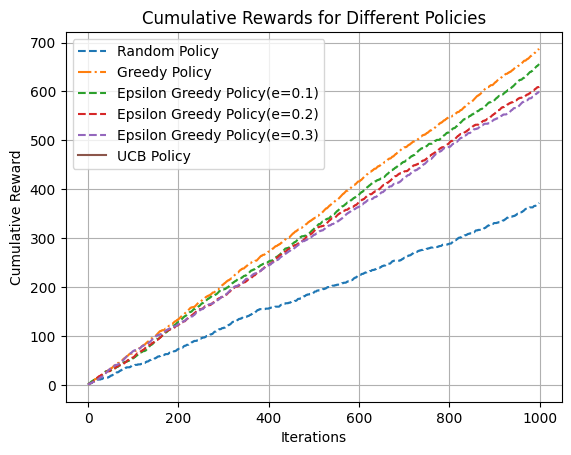

In [ ]:
#-----write your code below this line---------
#def cummulative_rewards(cumm_rewards, n):
Env = MovieEnvironment(data)
num_iterations=1000
random_cumm_reward=random_policy(Env, num_iterations)
greedy_policy_cumm_rewards=greedy_policy(Env, num_iterations)
epsilon_greedy_cumm_reward_1=epsilon_greedy_policy(Env, num_iterations, e=0.1)
epsilon_greedy_cumm_reward_2=epsilon_greedy_policy(Env, num_iterations, e=0.2)
epsilon_greedy_cumm_reward_3=epsilon_greedy_policy(Env, num_iterations, e=0.3)
ucb_cumm_reward, ucb_cumm_rewards_list = simulate_recommendations(data, bandit, num_iterations)

plt.plot(random_cumm_reward, label="Random Policy", linestyle='--')
plt.plot(greedy_policy_cumm_rewards, label="Greedy Policy",linestyle='dashdot')
plt.plot(epsilon_greedy_cumm_reward_1, label="Epsilon Greedy Policy(e=0.1)",linestyle='dashed')
plt.plot(epsilon_greedy_cumm_reward_2, label="Epsilon Greedy Policy(e=0.2)",linestyle='dashed')
plt.plot(epsilon_greedy_cumm_reward_3, label="Epsilon Greedy Policy(e=0.3)",linestyle='dashed')
plt.plot(ucb_cumm_rewards_list, label="UCB Policy", linestyle='solid')
plt.title('Cumulative Rewards for Different Policies')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid()
plt.show()


# Conclusion (0.5M)

Determine which policy performs the best based on cumulative reward. Provide a concise conclusion (250 words) summarizing the decision-making process and the trade-offs between exploration and exploitation.

`----write below this line------`

From the graph, we can make follwoing observations from the graph:-#
1.Random Policy : The line for random ploicy shows most variability and generally has the lowest rewards.
2.Greedy Policy :The red line indicates the greedy policy, which performs better than random but is limited by its lack of exploration.
3.Epsilon-Greedy Policy: This plicy shows better performance when compared with random policy.Lower epsilon values (ε =0.1) lead to higher cumulative rewards than (ε =0.2 & ε =0.3)
4.UCB Policy : The UCB policy performs the best, achieving the highest cumulative reward. The UCB policy effectively balances exploration and exploitation, allowing it to discover good arms and then exploit them efficiently.

In summary, the UCB policy is the most efficient at maximizing cumulative rewards by striking a balance between exploration and exploitation.

Trade-Offs: Policies with higher exploration (𝜖=0.3) may initially underperform but provide more robust learning in dynamic environments. In contrast, exploitation-heavy strategies (𝜖=0.1, UCB1) quickly achieve high cumulative rewards in stationary settings by capitalizing on known high-reward actions.
Hence for this environments with stationary rewards, UCB is the best choice due to its efficiency in balancing exploration and exploitation.

In [ ]:
#test2